In [1]:
# Importing necessary modules
import numpy as np#
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from datetime import datetime, timedelta
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_sun, get_body

### Reference Times

The time at which an astronomical event (a supernova, an eclipse, a gamma-ray burst) usually occurs is typically given in Julian days (JD). This is the time which has lapsed, in days, since noon at Greenwich on January 1, 4713 BC. There are variants such as the Modified Julian Date (MJD), which is the time in days since midnight, November 17 1858. MJD is typically used instead of JD simply because it removes a very large constant. The below code shows todays JD and MJD (as computed when I last evaluated this cell).

In [2]:
ut = Time(datetime.utcnow(), scale='utc')

print(f"The current time is: {ut.isot}")
print(f"The current time in JD is: {ut.jd}")
print(f"The current time in MJD is: {ut.mjd}")

The current time is: 2025-01-07T13:29:42.375
The current time in JD is: 2460683.0622960087
The current time in MJD is: 60682.56229600859


In [4]:
ut = Time(datetime(2024,3,21,0,0,0,0), scale='utc')

print(f"The current time is: {ut.isot}")
print(f"The current time in JD is: {ut.jd}")
print(f"The current time in MJD is: {ut.mjd}")

The current time is: 2024-03-21T00:00:00.000
The current time in JD is: 2460390.5
The current time in MJD is: 60390.0


## Equation of Time

Consider again the position of the Sun on the celestial sphere. If we used a sundial to time how long it took between consecutive passes of the Sun through the meridian, and also measured out 24 hours, what would it look like? If the orbit of the Earth were perfectly circular and the rotational axis of the Earth was perpendicular to the orbital plane, it should always be 0.

However, our orbit is elliptical and the Earth's rotational axis is not perpendicular to the orbital plane (obliquity). As such, the time between transits (Apparent Solar Time) is different to the time measured using a stop watch (Mean Solar Time), as shown in the plot below. This correction is known as the Equation of Time.

This means if you were timing your days using the Sun, you would be slower in June and November than if you used a stopwatch, and faster in January and August.

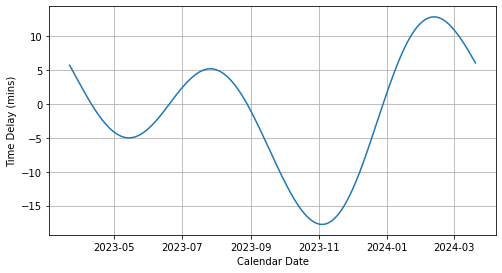

In [3]:
base = datetime(2024,3,20,12,0,0,0)
times = [base - timedelta(days=x) for x in range(365)]
ts = Time(times,format='datetime',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
with solar_system_ephemeris.set('builtin'):
    sun = get_sun(ts) # Get the location of the Sun
EoT = (sun.ra-ts.sidereal_time("mean","greenwich"))
EoT[EoT<-300*u.deg]=EoT[EoT<-300*u.deg]+360*u.deg

plt.figure(figsize=(8,4.2))
plt.subplot(111)
plt.grid(True)
plt.plot(times,EoT.hour*60)
plt.xlabel("Calendar Date")
plt.ylabel("Time Delay (mins)")
plt.savefig("Figures/EoT.svg")
plt.show()